In [15]:
import scipy
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import pairwise_distances

In [3]:
import matplotlib.pyplot as plt

In [4]:
X1, label1 = make_blobs(n_samples = 200,
                        n_features = 2,
                        centers = 2,
                        cluster_std = 5,
                        random_state = 123
                       )

In [5]:
X1

array([[ 4.83455936e+00,  1.61209639e+00],
       [-7.19342110e+00,  1.57331116e+00],
       [-1.19919003e+01, -3.38784956e+00],
       [ 8.94965320e+00, -2.34628131e+00],
       [ 5.46630481e+00, -7.33334000e+00],
       [-9.82679362e-01,  2.87439331e+00],
       [ 4.82713114e+00, -1.35870919e+01],
       [-5.95639441e+00, -4.86198432e-02],
       [ 3.25723451e+00, -3.81242660e+00],
       [-1.49388489e+01,  1.46494770e+00],
       [-9.32588959e+00,  4.75039194e+00],
       [ 1.23752259e+00, -6.81998526e+00],
       [ 1.19728386e+01, -5.62837526e+00],
       [-2.58199902e-01, -1.23070271e+01],
       [ 1.49590341e+01,  6.65671714e+00],
       [ 2.25314845e-01, -3.91267708e+00],
       [-5.93898363e+00,  2.41971297e+00],
       [-4.66024882e+00,  5.12509843e+00],
       [-2.49261965e+00,  3.07334679e-02],
       [ 7.73413068e+00, -2.65986906e+00],
       [-5.12306455e-01, -7.42476287e-01],
       [ 1.57887480e+00, -2.01725863e+00],
       [-4.20565001e+00, -2.44769569e+00],
       [-4.

In [7]:
label1

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1])

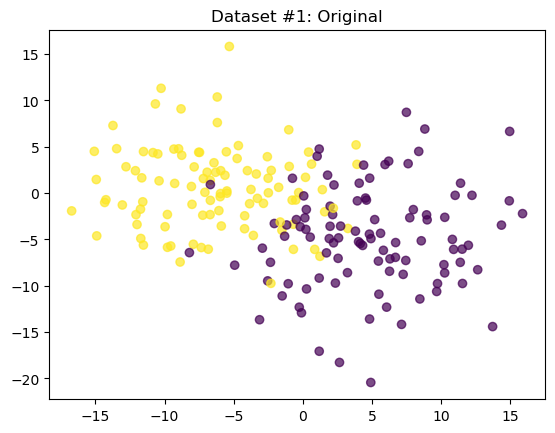

In [11]:
plt.scatter(X1[:,0], X1[:,1],
            c = label1,
            alpha = 0.7
           )
plt.title('Dataset #1: Original')
plt.show()

In [17]:
dist_eucl = pairwise_distances(X1,
                               metric = 'euclidean')

In [18]:
dist_eucl

array([[ 0.        , 12.02804299, 17.5536094 , ..., 11.76959535,
         3.72163075, 19.41570144],
       [12.02804299,  0.        ,  6.90206621, ...,  2.40862884,
        11.62576328,  8.68680091],
       [17.5536094 ,  6.90206621,  0.        , ...,  5.90862362,
        18.02212751, 10.82155646],
       ...,
       [11.76959535,  2.40862884,  5.90862362, ...,  0.        ,
        12.12054427, 10.71448067],
       [ 3.72163075, 11.62576328, 18.02212751, ..., 12.12054427,
         0.        , 17.70706793],
       [19.41570144,  8.68680091, 10.82155646, ..., 10.71448067,
        17.70706793,  0.        ]])

In [19]:
dist_eucl.shape

(200, 200)

In [20]:
import numpy as np

In [23]:
np.triu_indices_from(dist_eucl)

(array([  0,   0,   0, ..., 197, 197, 198]),
 array([  1,   2,   3, ..., 198, 199, 199]))

In [28]:
dist_to_plot = dist_eucl[np.triu_indices_from(dist_eucl)]

In [29]:
dist_to_plot

array([ 0.        , 12.02804299, 17.5536094 , ...,  0.        ,
       17.70706793,  0.        ])

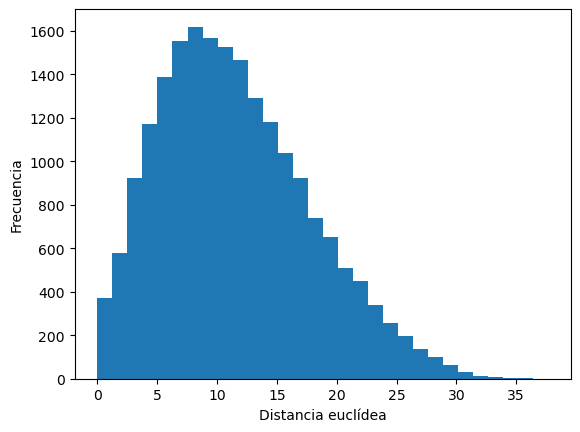

In [30]:
plt.hist(dist_to_plot, bins=30)
plt.xlabel("Distancia euclídea")
plt.ylabel("Frecuencia")
plt.show()

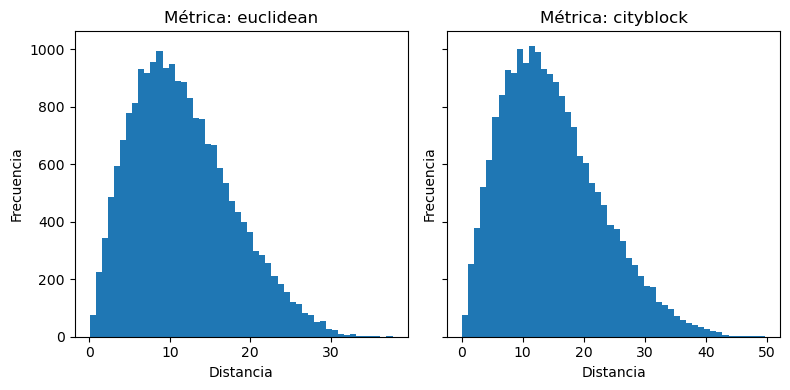

In [47]:
def plot_distance_hist(ax, X, metric, bins):
    D = pairwise_distances(X, metric=metric)
    d = D[np.triu_indices_from(D, k=1)]
    ax.hist(d, bins=bins)
    ax.set_title(f"Métrica: {metric}")
    ax.set_xlabel("Distancia")
    ax.set_ylabel("Frecuencia")

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

plot_distance_hist(axes[0], X1, metric="euclidean", bins=50)
plot_distance_hist(axes[1], X1, metric="cityblock", bins=50)

plt.tight_layout()
plt.show()